In [220]:
import ctypes
import os
import numpy as np
import pandas as pd
import utils as benchUtils
import matplotlib.pylab as plt

In [221]:
maxThreads = 12

binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchTAS.restype = benchUtils.benchData

threadNum = [i for i in range(2, maxThreads+1)]
benchmarkList = {threads: [binary.benchTAS(threads, 1000, 1) for _ in range(1000)] for threads in threadNum}

df = benchUtils.dataframeBuilder(benchmarkList)


Text(0, 0.5, 'Throughput / acq/s')

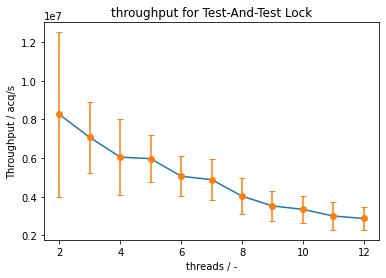

In [222]:
plt.plot(df["threads"], df["meanTP"])
plt.errorbar(df["threads"], df["meanTP"], df["stddTP"], linestyle='None', fmt='o', capsize=3)
plt.title("throughput for Test-And-Test Lock")
plt.xlabel("threads / -")
plt.ylabel("Throughput / acq/s")